# Name - Sourav Kumar Singh

# Batch - DS2401

# Temperature Forecast  Project

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

In these data we predict the minimum temperature for the next days and maximum temperature for the next days

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import Datasets

In [2]:
url = "C:/Users/ssour/OneDrive/Desktop/temperature.csv"
df = pd.read_csv(url)
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


# First we predict next day maximum temperature

In [3]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [4]:
# Top 10 data
df.head(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
5,6,30-06-2013,31.9,23.5,52.437126,85.307251,29.219342,23.822613,6.182295,50.231389,...,0.0,0.0,0.0,37.5102,127.042,54.6384,0.1457,5873.780762,31.5,24.0
6,7,30-06-2013,31.4,24.4,56.287189,81.019760,28.551859,24.238467,5.587135,125.110007,...,0.0,0.0,0.0,37.5776,126.838,12.3700,0.0985,5849.233398,30.9,23.4
7,8,30-06-2013,32.1,23.6,52.326218,78.004539,28.851982,23.819054,6.104417,42.011547,...,0.0,0.0,0.0,37.4697,126.910,52.5180,1.5629,5863.992188,31.1,22.9
8,9,30-06-2013,31.4,22.0,55.338791,80.784607,28.426975,23.332373,6.017135,85.110971,...,0.0,0.0,0.0,37.4967,126.826,50.9312,0.4125,5876.901367,31.3,21.6
9,10,30-06-2013,31.6,20.5,56.651203,86.849632,27.576705,22.527018,6.518841,63.006075,...,0.0,0.0,0.0,37.4562,126.955,208.5070,5.1782,5893.608398,30.5,21.0


In [5]:
# Last 10 data
df.tail(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7740,16,30-08-2017,21.7,15.2,27.868839,85.979271,26.400334,17.217080,6.395609,82.487679,...,0.0,0.0,0.0,37.4697,126.995,82.2912,2.2579,4406.334473,25.9,15.7
7741,17,30-08-2017,22.6,14.6,35.059216,89.616730,26.112684,16.446214,5.147585,118.735384,...,0.0,0.0,0.0,37.6181,127.099,53.4712,0.6970,4460.537109,26.8,12.9
7742,18,30-08-2017,23.3,18.2,30.259682,86.565193,26.474403,17.289157,6.522731,94.203783,...,0.0,0.0,0.0,37.4832,127.024,56.4448,1.2313,4435.611816,27.8,16.7
7743,19,30-08-2017,22.6,15.0,25.536045,78.779045,26.596280,17.856040,6.905963,54.030075,...,0.0,0.0,0.0,37.5776,126.938,75.0924,1.7678,4495.473633,27.1,16.6
7744,20,30-08-2017,22.7,15.9,38.216373,94.428116,24.037222,15.772677,6.478060,112.580310,...,0.0,0.0,0.0,37.6181,127.004,146.5540,4.7296,4554.965332,26.7,16.3
7745,21,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8
7749,25,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.0,0.0,0.0,37.5237,126.970,19.5844,0.2713,4451.345215,27.8,17.4


# Exploratory Data Analysis

In [6]:
# Checking the dimension of the dataset
df.shape

(7750, 25)

 we can see that in temperature forecast datasets there are 7752 rows and 25 columns

In [7]:
print("The dimensions of the dataset: ",df.shape)
print("The column headers :",df.columns)

The dimensions of the dataset:  (7750, 25)
The column headers : Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')


In [8]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7680.000000,7680.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,7675.000000,...,7675.000000,7675.000000,7675.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7723.000000,7723.000000
mean,13.000000,29.768464,23.225742,56.758747,88.377125,29.613845,23.512997,7.096501,62.495273,0.368744,...,0.482312,0.276208,0.267307,37.544720,126.991400,61.854944,1.256692,5341.549330,30.275437,22.932837
std,7.211568,2.966947,2.409233,14.656200,7.183861,2.942632,2.342243,2.177080,33.679766,0.262369,...,1.746438,1.148292,1.191776,0.050335,0.079406,54.256953,1.369833,428.996445,3.123441,2.483181
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963839,84.223911,27.673670,22.089794,5.679220,37.272626,0.146673,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.189583,93.743027,31.709230,25.152881,8.031527,84.222851,0.575126,...,0.018340,0.007893,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000


In [9]:
# checking the types of columns
df.dtypes

station               int64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

In [11]:
# Now checking null values in this dataset
df.isnull().sum()

station              0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [12]:
# Count values of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1     310
14    310
24    310
23    310
22    310
21    310
20    310
19    310
18    310
17    310
16    310
15    310
13    310
2     310
12    310
11    310
10    310
9     310
8     310
7     310
6     310
5     310
4     310
3     310
25    310
Name: station, dtype: int64


31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: Present_Tmax, Length: 167, dtype: int64


24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
29.7      1
29.6      1
14.3      1
29.9      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64


71.658089    2
77.030350    2
51.810596    2
41.429508    1
40.205944    1
            ..
52.924568    1
60.215191    1
46.799820    1
52.227486    1
22.933014    1
Name: LDAPS_RHmin, Length: 7672, dtype: int64


96.058418    2
99.251968    2
91.878174    2
94.795967    2
85.863731    2
            ..
96.718201    1
94.153252    1
96.910126    1
93.541885   

In [13]:
# Filling null vlaues in Present_Tmax with its mean
df['Present_Tmax']= df['Present_Tmax'].fillna(df['Present_Tmax'].mean())

In [14]:
# Filling null vlaues in Present_Tmin with its mean
df['Present_Tmin']= df['Present_Tmin'].fillna(df['Present_Tmin'].mean())

In [15]:
# Filling null vlaues in LDAPS_RHmin with its mean
df['LDAPS_RHmin']= df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())

In [16]:
# Filling null vlaues in LDAPS_RHmax with its mean
df['LDAPS_RHmax']= df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())

In [17]:
# Filling null vlaues in LDAPS_Tmax_lapse with its mean
df['LDAPS_Tmax_lapse']= df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())

In [18]:
# Filling null vlaues in LDAPS_Tmin_lapse with its mean
df['LDAPS_Tmin_lapse']= df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())

In [19]:
# Filling null vlaues in LDAPS_WS with its mean
df['LDAPS_WS']= df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())

In [20]:
# Filling null vlaues in LDAPS_LH with its mean
df['LDAPS_LH']= df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())

In [21]:
# Filling null vlaues in LDAPS_CC1 with its mean
df['LDAPS_CC1']= df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())

In [22]:
# Filling null vlaues in LDAPS_CC2 with its mean
df['LDAPS_CC2']= df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())

In [23]:
# Filling null vlaues in LDAPS_CC3 with its mean
df['LDAPS_CC3']= df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())

In [24]:
# Filling null vlaues in LDAPS_CC4 with its mean
df['LDAPS_CC4']= df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())

In [25]:
# Filling null vlaues in LDAPS_PPT1 with its mean
df['LDAPS_PPT1']= df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())

In [26]:
# Filling null vlaues in LDAPS_PPT2 with its mean
df['LDAPS_PPT2']= df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())

In [27]:
# Filling null vlaues in LDAPS_PPT3 with its mean
df['LDAPS_PPT3']= df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())

In [28]:
# Filling null vlaues in LDAPS_PPT4 with its mean
df['LDAPS_PPT4']= df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())

In [29]:
# Filling null vlaues in Next_Tmax with its mean
df['Next_Tmax']= df['Next_Tmax'].fillna(df['Next_Tmax'].mean())

In [30]:
# Filling null vlaues in Next_Tmin with its mean
df['Next_Tmin']= df['Next_Tmin'].fillna(df['Next_Tmin'].mean())

In [31]:
# Now checking null values in this dataset
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Here you can see that all null values has been removed .

<Axes: ylabel='Date'>

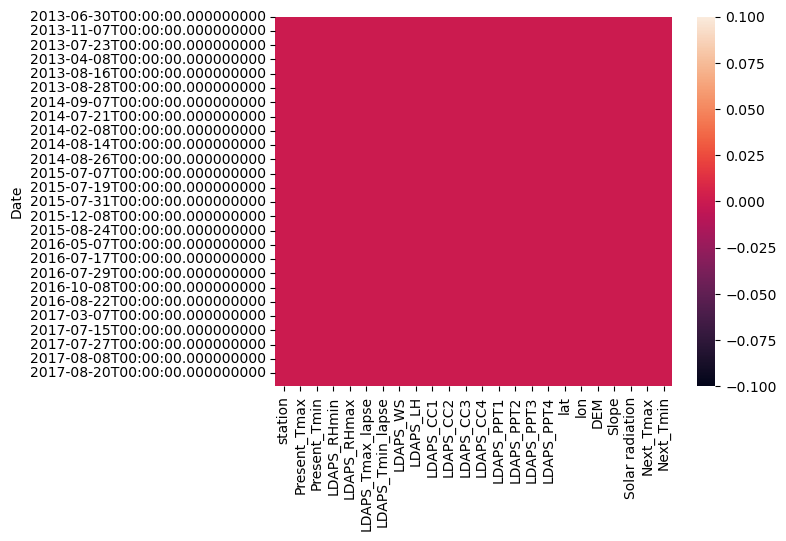

In [32]:
# Lets visualize itusing heatmap
sns.heatmap(df.isnull())

In [33]:
# Checking for numerical columns
numerical_col = []
for i  in df.dtypes.index:
    if df.dtypes[i]!= "object":
        numerical_col.append(i)
print("Numerical Columns: ",numerical_col)

Numerical Columns:  ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']


In [34]:
# Checking number of unique values in ech column
df.nunique().to_frame("No. of unique values")

,No. of unique values
station,25
Present_Tmax,168
Present_Tmin,156
LDAPS_RHmin,7673
LDAPS_RHmax,7665
LDAPS_Tmax_lapse,7676
LDAPS_Tmin_lapse,7676
LDAPS_WS,7676
LDAPS_LH,7676
LDAPS_CC1,7570


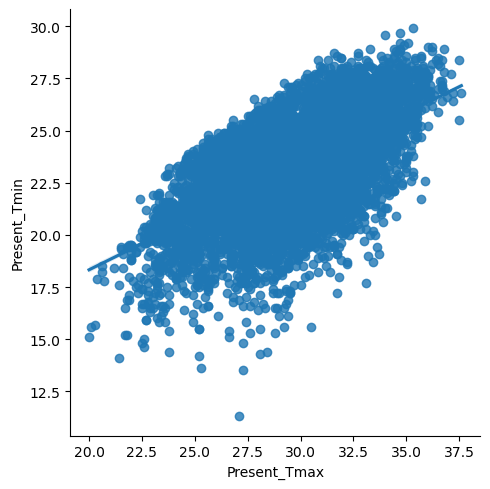

In [35]:
sns.lmplot(x='Present_Tmax',y='Present_Tmin',data =df,palette='colorblind')

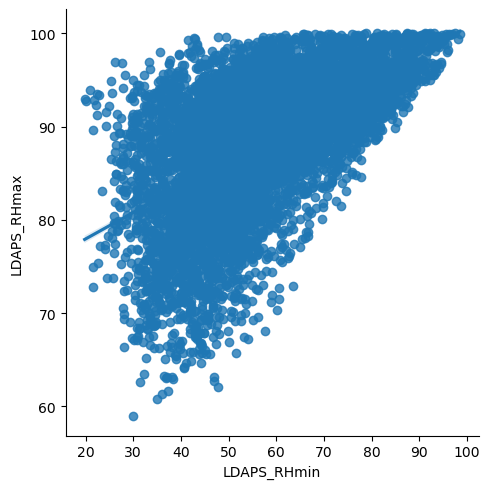

In [36]:
sns.lmplot(x='LDAPS_RHmin',y='LDAPS_RHmax',data =df,palette='colorblind')

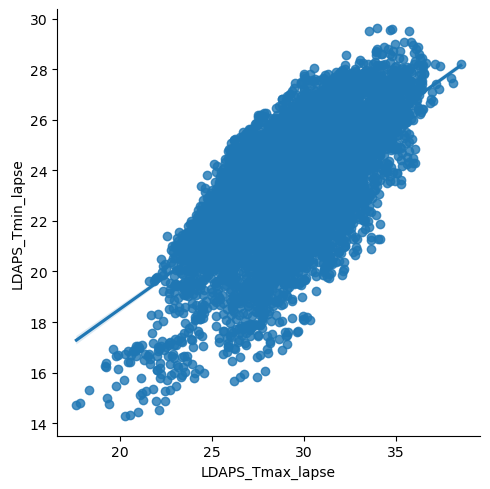

In [37]:
sns.lmplot(x='LDAPS_Tmax_lapse',y='LDAPS_Tmin_lapse',data =df,palette='colorblind')

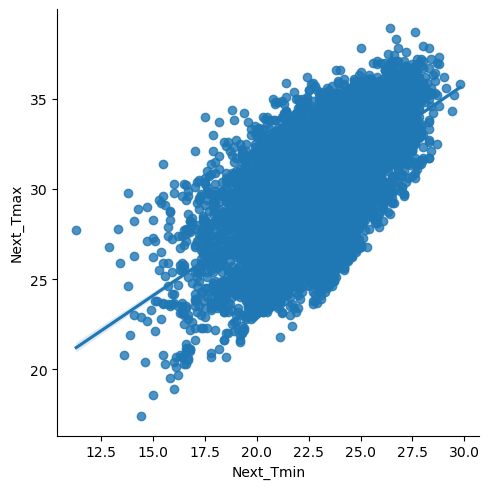

In [38]:
sns.lmplot(x='Next_Tmin',y='Next_Tmax',data =df,palette='colorblind')

In [39]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

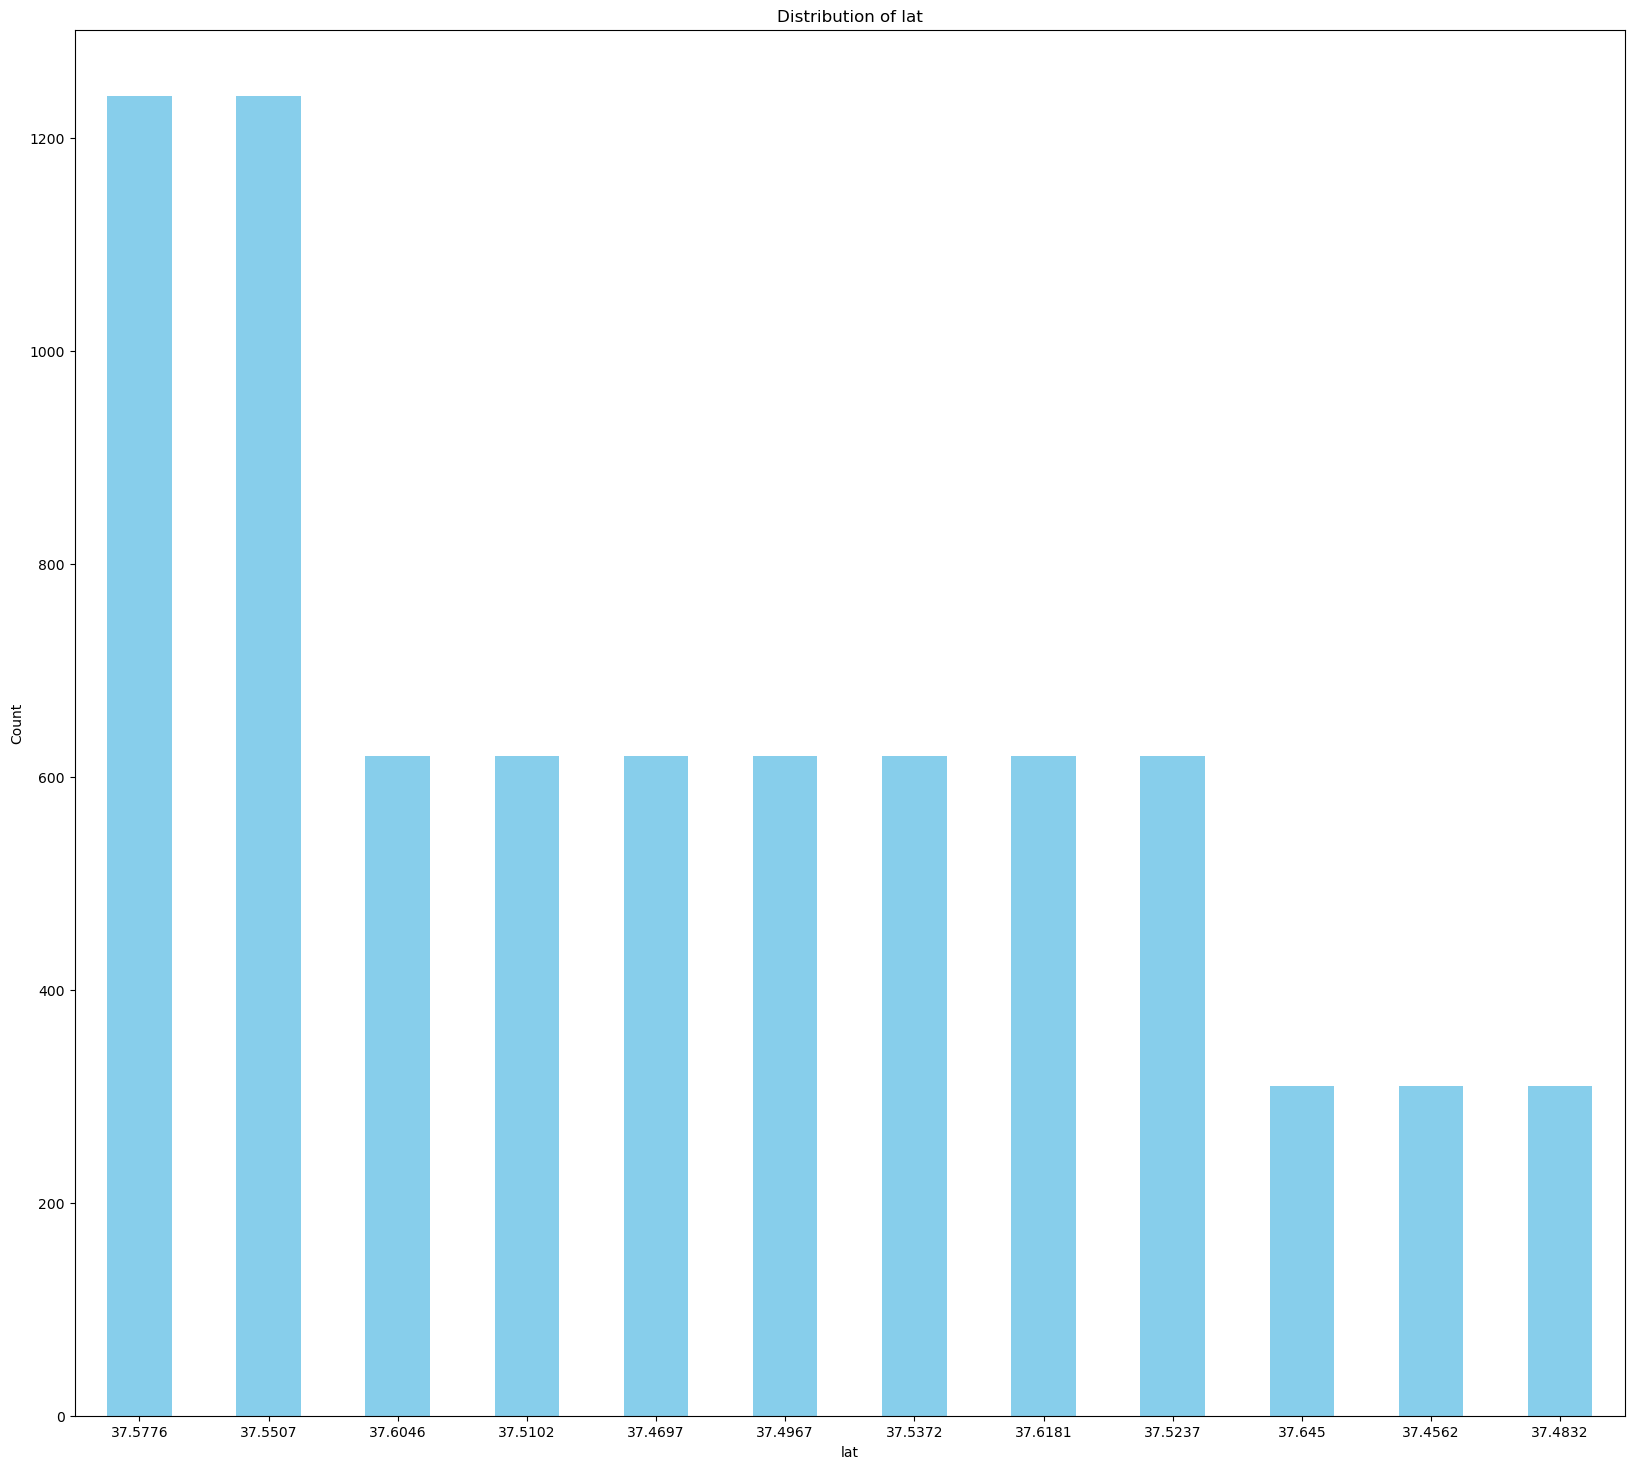

In [40]:
# Assuming df is your DataFrame and it has a column named 'lat'
job_counts = df["lat"].value_counts()

plt.figure(figsize=(20,18))
job_counts.plot(kind='bar', color='Skyblue')
plt.title("Distribution of lat")
plt.xlabel("lat")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Checking how the data is distributed in each columns

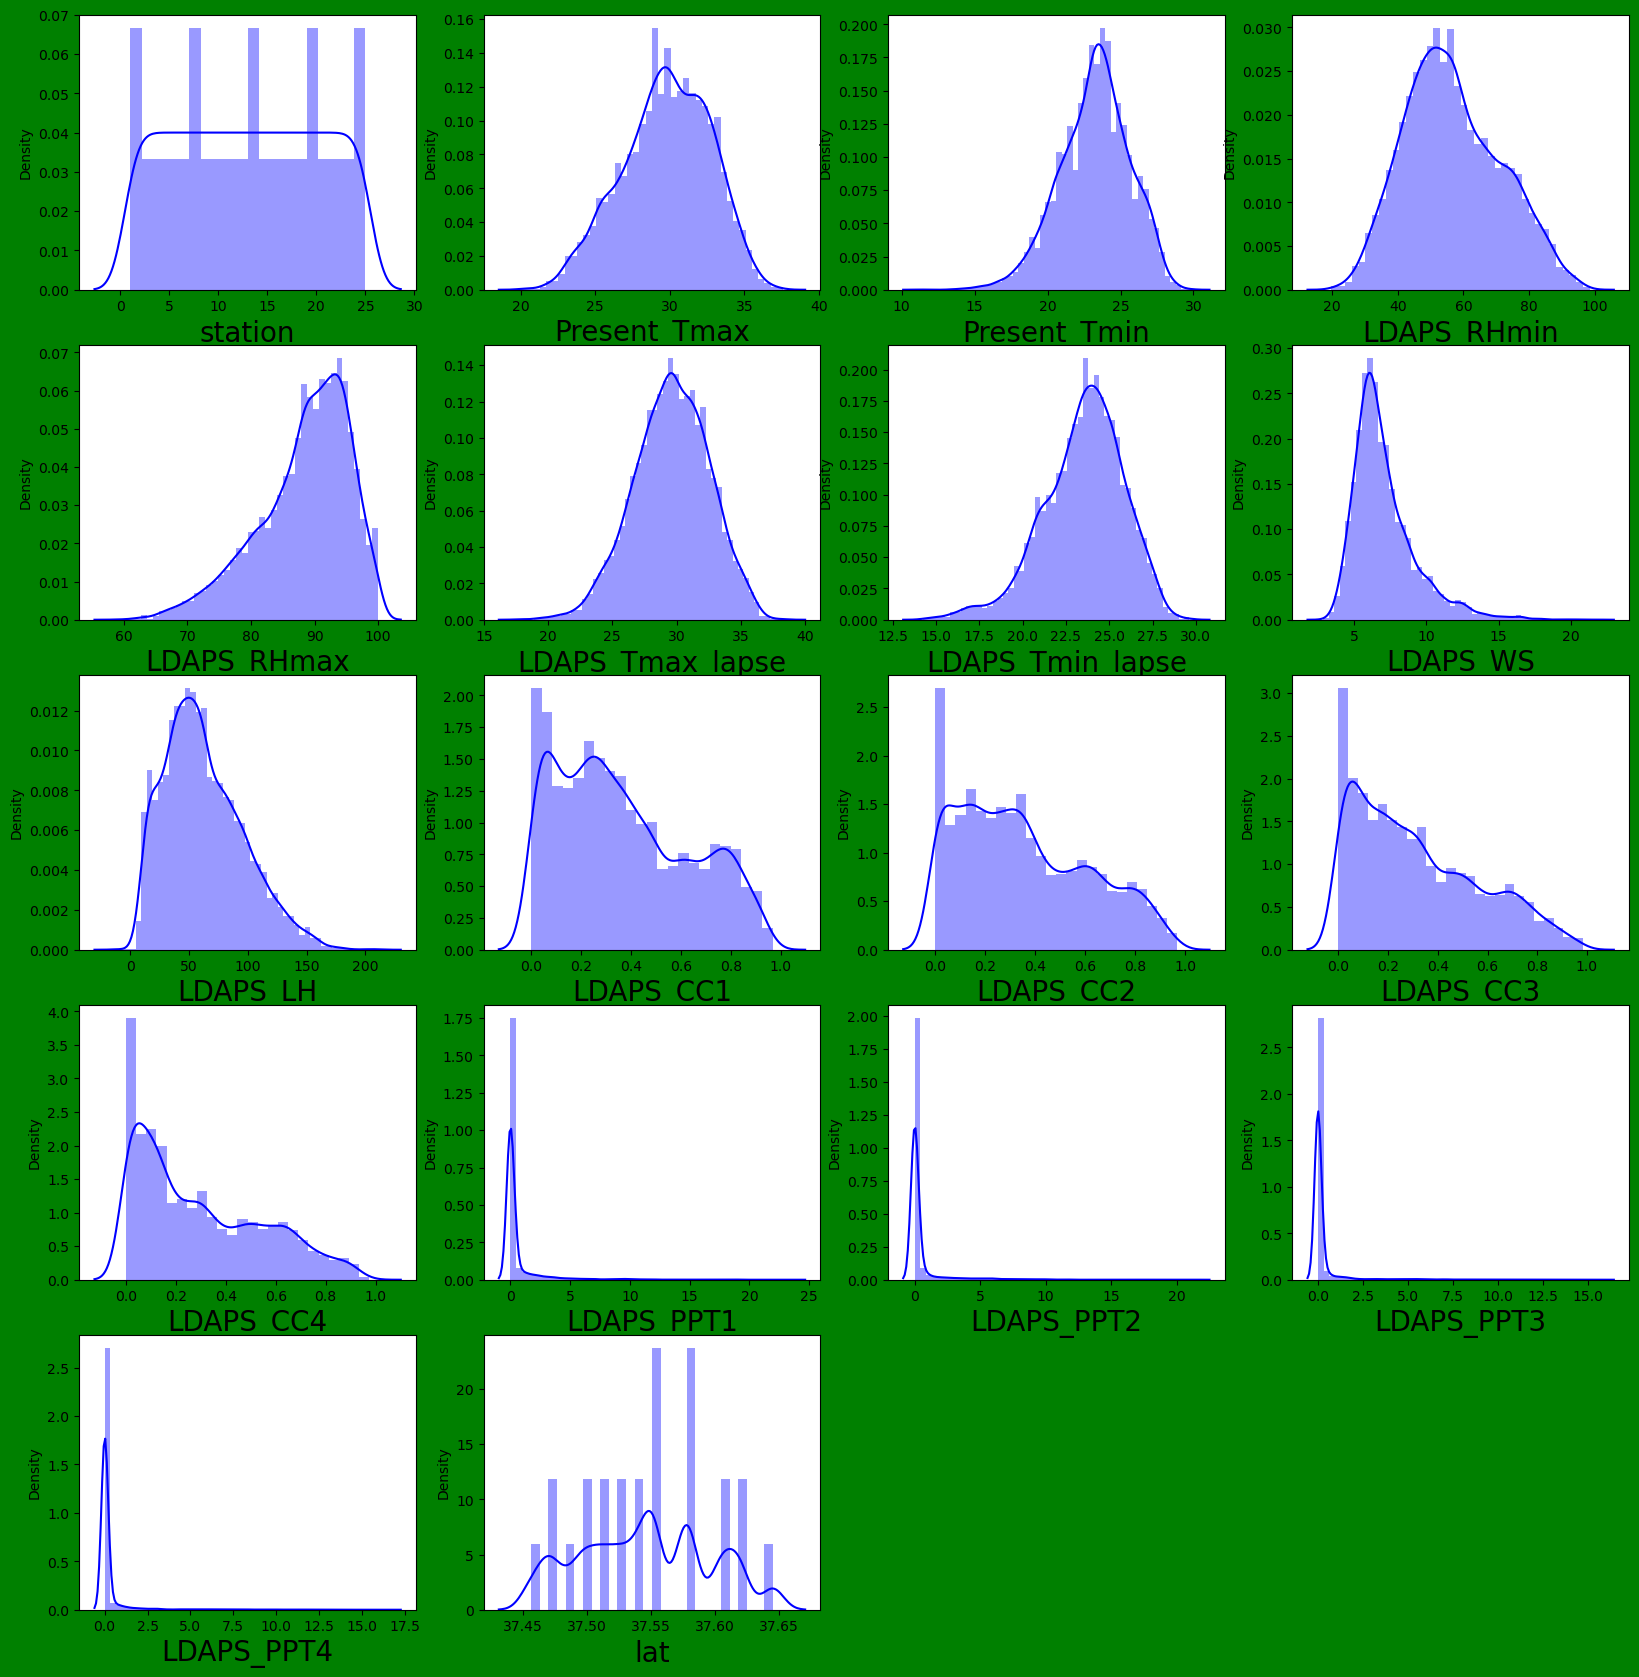

In [41]:
plt.figure(figsize=(20,25), facecolor = 'green')
plotnumber =1
for column in df:
    if plotnumber <= 18:
        ax =plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color = 'b')
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

# Checking for outliers

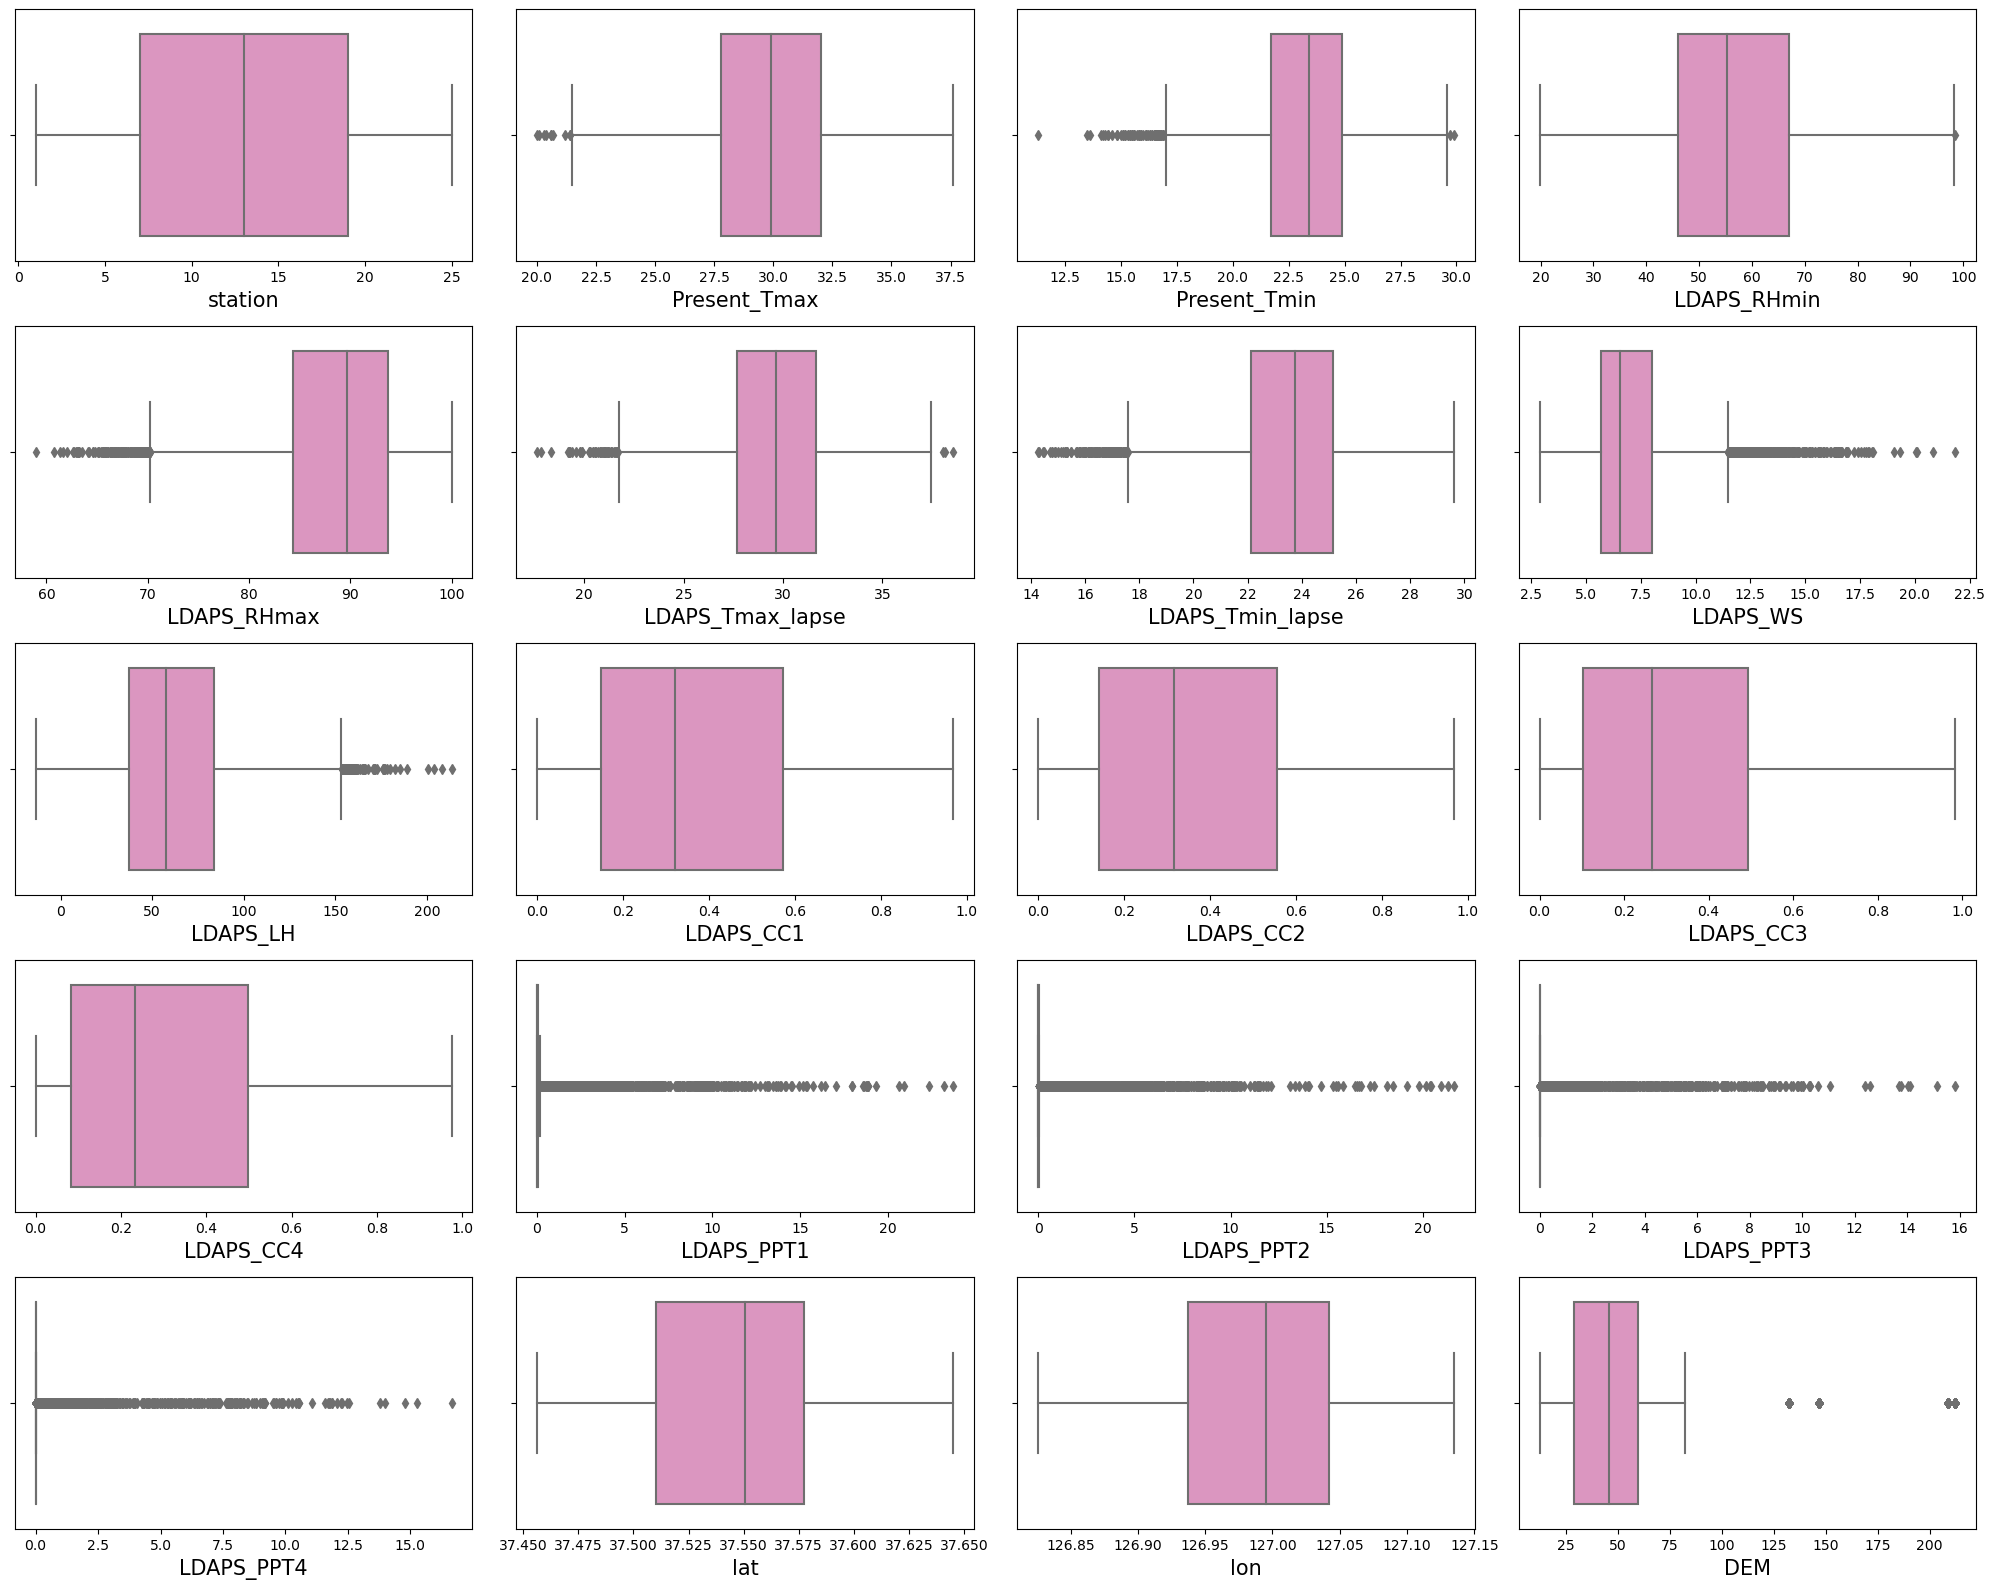

In [42]:
# Now we check the data have outliers or not
num_numerical_cols = len(numerical_col)
num_rows = 5  # Number of rows in the subplot grid
num_cols = 4  # Number of columns in the subplot grid
total_subplots = num_rows * num_cols

# Create a new figure and set its size
plt.figure(figsize=(20, 16), facecolor="white")  # Adjust the figure size as needed

# Iterate over numerical columns and create subplots for boxplots
plotnumber = 1
for col in numerical_col:
    if plotnumber <= total_subplots:
        # Create subplot at the specified position
        ax = plt.subplot(num_rows, num_cols, plotnumber)
        
        # Plot boxplot for the current column using seaborn
        sns.boxplot(x=df[col], palette="Set2_r", ax=ax)
        
        # Customize subplot labels and ticks
        plt.xlabel(col, fontsize=15)
        plt.ylabel("")  # Clear y-axis label
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)
        
        plotnumber += 1  # Increment plotnumber for the next subplot

# Adjust layout to prevent overlap and improve readability
plt.tight_layout()
plt.show()  # Display the figure with subplots

Here we can see that almost all columns contains outliers

# Using IQR method to remove outliers

In [43]:
import pandas as pd

# Assuming df is your DataFrame containing the relevant columns

# Calculate IQR
columns_of_interest = ['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
         'LDAPS_PPT1', 'DEM']

Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Remove outliers
df1 = df[~((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Print cleaned DataFrame
print("DataFrame after removing outliers:")
print(df1)

# Optional: Print removed outliers
print("\nOutliers removed:")
print(outliers)


DataFrame after removing outliers:
            station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30        2          31.9          21.6    52.263397    90.604721   
2013-06-30        3          31.6          23.3    48.690479    83.973587   
2013-06-30        4          32.0          23.4    58.239788    96.483688   
2013-06-30        5          31.4          21.9    56.174095    90.155128   
2013-06-30        6          31.9          23.5    52.437126    85.307251   
...             ...           ...           ...          ...          ...   
2017-08-30       21          23.1          17.8    24.688997    78.261383   
2017-08-30       22          22.5          17.4    30.094858    83.690018   
2017-08-30       23          23.3          17.1    26.741310    78.869858   
2017-08-30       24          23.3          17.7    24.040634    77.294975   
2017-08-30       25          23.2        

# Now Checking for skewness

In [44]:
# Now cheking skewness
df1.skew()

station            -0.001472
Present_Tmax       -0.266553
Present_Tmin       -0.161521
LDAPS_RHmin         0.366921
LDAPS_RHmax        -0.491990
LDAPS_Tmax_lapse   -0.144799
LDAPS_Tmin_lapse   -0.287296
LDAPS_WS            0.926111
LDAPS_LH            0.512207
LDAPS_CC1           0.752723
LDAPS_CC2           0.693313
LDAPS_CC3           0.769781
LDAPS_CC4           0.767224
LDAPS_PPT1          4.106530
LDAPS_PPT2          7.753461
LDAPS_PPT3          6.729558
LDAPS_PPT4          6.959052
lat                 0.333688
lon                -0.331249
DEM                 0.445091
Slope               1.111911
Solar radiation    -0.400529
Next_Tmax          -0.277801
Next_Tmin          -0.263748
dtype: float64

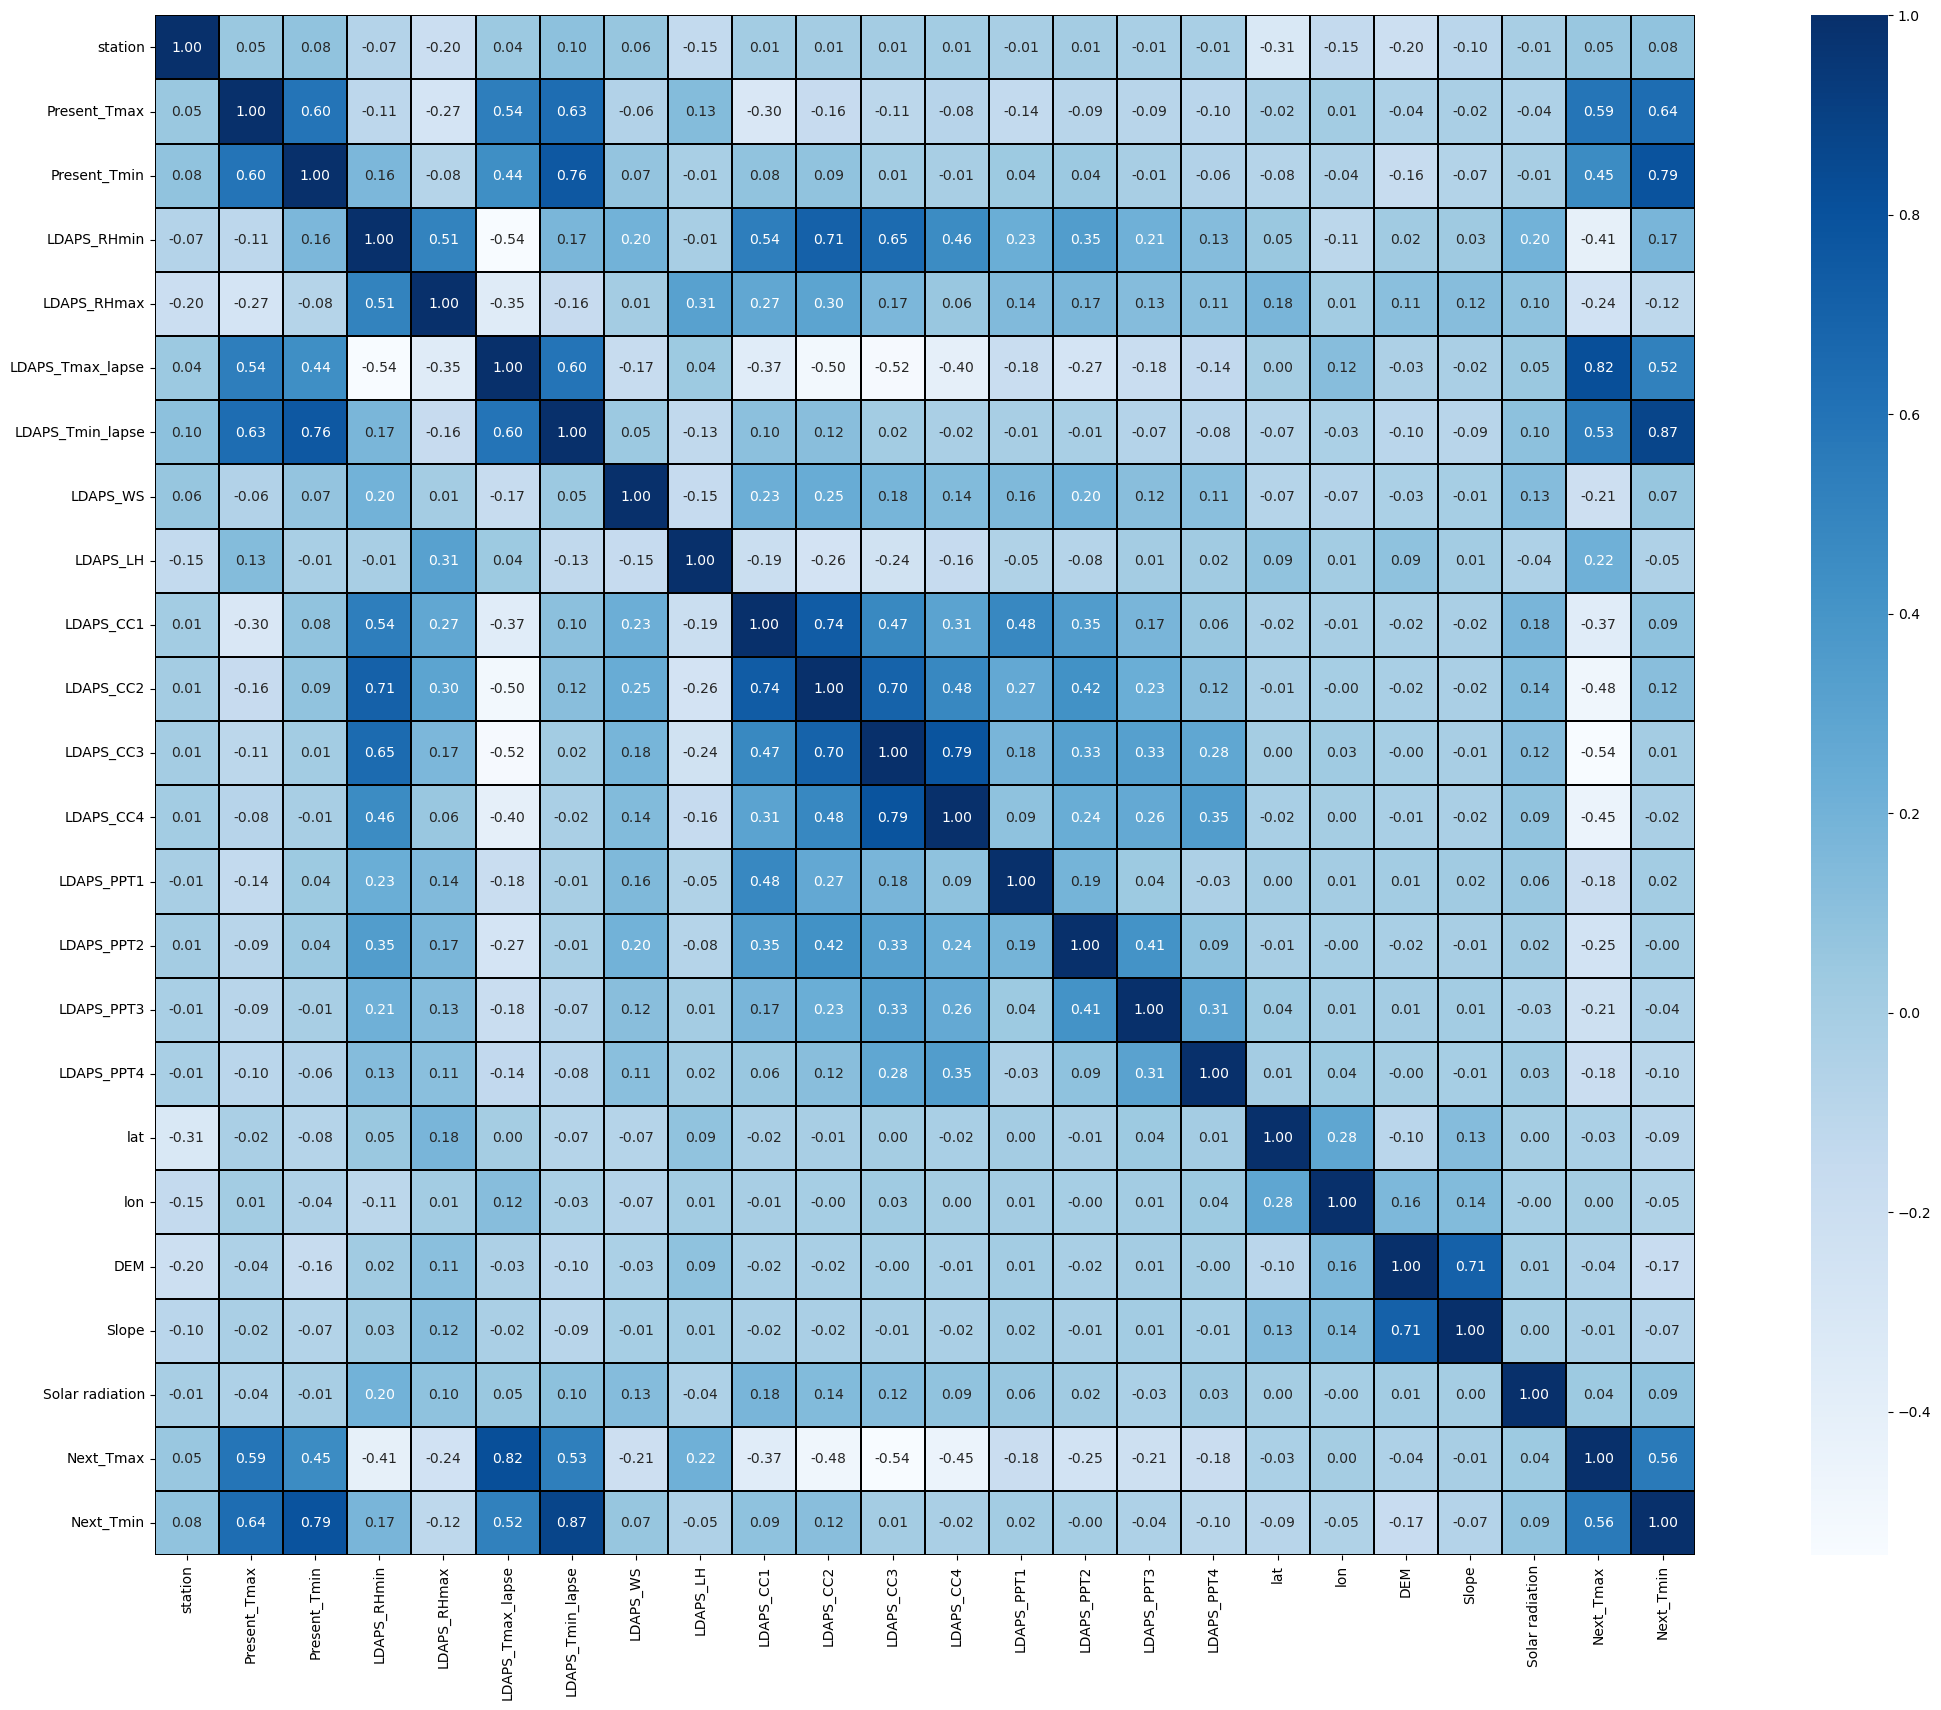

In [45]:
# Set the figure size
plt.figure(figsize=(30,20))

# Create a heatmap of the correlation matrix
sns.heatmap(df1.corr(), 
            annot=True,        # Show correlation values on the heatmap
            cmap="Blues",      # Set the color map to 'Blues'
            linewidths=0.1,    # Set width between cells
            linecolor='black', # Color of the lines separating cells
            fmt='.2f',         # Format of annotations (2 decimal places)
            square=True)       # Ensure cells are square-shaped

# Rotate y-axis labels to be horizontal
plt.yticks(rotation=0)

# Display the heatmap
plt.show()

In [46]:
# Removing Skewnees using cuberoot method
df1['Present_Tmax'] = np.cbrt(df1['Present_Tmax'])
df1['Present_Tmin'] = np.cbrt(df1['Present_Tmin'])
df1['LDAPS_Tmax_lapse'] = np.cbrt(df1['LDAPS_Tmax_lapse'])
df1['LDAPS_Tmin_lapse'] = np.cbrt(df1['LDAPS_Tmin_lapse'])
df1['Present_Tmin'] = np.cbrt(df1['Present_Tmin'])
df1['LDAPS_Tmax_lapse'] = np.cbrt(df1['LDAPS_Tmax_lapse'])

Now at these time all skewness removed

# Separating Features and  Label

In [47]:
# Separating the independent and target varaible into x and y
x = df1.drop(['Next_Tmax'], axis=1)  # Features we Next_Tmax  columns
y = df1['Next_Tmax']    #  Here now the Next_Tmax is my target variable
print("Feature Dimensions= ",x.shape)
print("Label Dimensions",y.shape)

Feature Dimensions=  (4747, 23)
Label Dimensions (4747,)


In [48]:
# We drop the Next_Tmin columns because these is also my target variable
x.drop(["Next_Tmin"], axis=1, inplace=True)

# Find the Best model

In [49]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

# Find the best accuracy and random state

In [50]:
# Finding the best random state
maxAccu = 0
maxRS = 0
for i in range(1, 10):
    # Splitting the data into train and test sets using current random state (i)
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=i)
    
    # Initializing and training the RandomForestRegressor
    RFR = RandomForestRegressor()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is ",maxAccu,"on Random_State",maxRS)

Maximum r2 score is  0.8729090494091635 on Random_State 3


# Creating train test split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=maxRS)

In [52]:
# Assuming x_test, y_test, x_train, y_train are your datasets
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_test shape: (1425, 22)
y_test shape: (1425,)
x_train shape: (3322, 22)
y_train shape: (3322,)


# Linear Regression

In [53]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train= LR.predict(x_train)
print(LR)
print("R2_Score: ",r2_score(y_test,pred_LR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_LR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_LR)))

LinearRegression()
R2_Score:  0.7708396184287523
R2_Score on training Data:  76.12898639567534
Mean Absolute error:- 0.9812621532008817
Mean Squared error:- 1.651102964845632
Root Mean Squared Error:- 1.2849525146267593


# Random Forest Regressor

In [54]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train= RFR.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_RFR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_RFR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_Score:  0.8713369905680304
R2_Score on training Data:  98.12510494629038
Mean Absolute error:- 0.7156067889262192
Mean Squared error:- 0.9270183392195066
Root Mean Squared Error:- 0.9628179159215446


# KNN

In [55]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train= knn.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_knn))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_knn))
print("Mean Squared error:-",mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_Score:  0.4244663246519158
R2_Score on training Data:  62.80927338562314
Mean Absolute error:- 1.5899843702224614
Mean Squared error:- 4.14672619769696
Root Mean Squared Error:- 2.036351197042632


# Gradient Boosting Regressor

In [56]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train= GBR.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_GBR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_GBR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_Score:  0.8437156765870792
R2_Score on training Data:  87.52719156005615
Mean Absolute error:- 0.8117192243253125
Mean Squared error:- 1.1260301976139795
Root Mean Squared Error:- 1.0611457004643516


# Decision Tree Regressor

In [57]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_dtr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_dtr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_Score:  0.678234397519201
R2_Score on training Data:  100.0
Mean Absolute error:- 1.074787326986377
Mean Squared error:- 2.318324557668851
Root Mean Squared Error:- 1.5226045309497969


# Ridge

In [58]:
rd = Ridge()
rd.fit(x_train,y_train)
pred_ridge = rd.predict(x_test)
pred_train = rd.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_ridge))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_ridge))
print("Mean Squared error:-",mean_squared_error(y_test,pred_ridge))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2_Score:  0.7283524068650152
R2_Score on training Data:  72.39302908624158
Mean Absolute error:- 1.0839711453907646
Mean Squared error:- 1.9572237720284358
Root Mean Squared Error:- 1.3990081386569686


# Extra Trees Regressor

In [59]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr = etr.predict(x_test)
pred_train = etr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_etr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_etr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_etr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_Score:  0.8961724721704611
R2_Score on training Data:  100.0
Mean Absolute error:- 0.6374456074927699
Mean Squared error:- 0.7480784324782814
Root Mean Squared Error:- 0.8649152747398333


# Now my Extra Trees Regressor is best model

In [60]:
# Train the ETR regressor
etr.fit(x_train, y_train)

ExtraTreesRegressor()

In [61]:
# Make predictions
y_pred = etr.predict(x_test)

In [62]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

R2 Score: 0.8971793767305462
Mean Squared Error: 0.7408236745088895


# Now saving the model using joblib library

In [63]:
# Saving the model
import joblib
joblib.dump(etr,"Temperature_forecast_max.pkl")

['Temperature_forecast_max.pkl']

In [64]:
# Open the file
import pickle
filename = "Temperature_forecast_max.pkl"
pickle.dump(etr, open(filename,'wb'))  #Saved model

In [65]:
load_model = pickle.load(open("Temperature_forecast_max.pkl",'rb'))
result = load_model.score(x_test,y_test)
print(result*100)

89.71793767305462


# Making the diagram to predict Maximum temperature for next day 

In [66]:
# Define the input data ( characteristics)
input_data_numerical = [2,31.9,21.6,52.26339722,90.60472107,29.85068856,24.03500932,5.691889932,51.93744783,0.225508198,0.251771373,0.159444059,0.127727264,0,0,0,0,37.6046,127.032,44.7624,0.5141,5869.3125
]

# Load your trained model
model = joblib.load('Temperature_forecast_max.pkl')

# Make prediction using the trained model
prediction_max = load_model.predict([input_data_numerical])

# Print the input data and predicted the maximym temperature
print("Input Data (Numerical):", input_data_numerical)
print("Predict the maximum temperature :", prediction_max)

Input Data (Numerical): [2, 31.9, 21.6, 52.26339722, 90.60472107, 29.85068856, 24.03500932, 5.691889932, 51.93744783, 0.225508198, 0.251771373, 0.159444059, 0.127727264, 0, 0, 0, 0, 37.6046, 127.032, 44.7624, 0.5141, 5869.3125]
Predict the maximum temperature : [35.536]


This is my Maximum temperature 

# Now we predict Min temperature for next day

In  now  my Next day temperature  is my target variable

# Separating Features and  Label

In [67]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [68]:
# Separating the independent and target varaible into x and y
x = df1.drop(['Next_Tmin'], axis=1)  # Features we remove  Next_Tmin columns
y = df1['Next_Tmin']    #  Here now the Next_Tmin is my target variable
print("Feature Dimensions= ",x.shape)
print("Label Dimensions",y.shape)

Feature Dimensions=  (4747, 23)
Label Dimensions (4747,)


In [69]:
# We drop the Next_Tmax columns because these is also my target variable
x.drop(["Next_Tmax"], axis=1, inplace=True)

# Find the best accuracy and random state

In [70]:
# Finding the best random state
maxAccu = 0
maxRS = 0
for i in range(1, 10):
    # Splitting the data into train and test sets using current random state (i)
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=i)
    
    # Initializing and training the RandomForestRegressor
    RFR = RandomForestRegressor()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is ",maxAccu,"on Random_State",maxRS)

Maximum r2 score is  0.898202463643351 on Random_State 6


# Creating train test split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=maxRS)

In [72]:
# Assuming x_test, y_test, x_train, y_train are your datasets
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_test shape: (1425, 22)
y_test shape: (1425,)
x_train shape: (3322, 22)
y_train shape: (3322,)


# Linear Regression

In [73]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train= LR.predict(x_train)
print(LR)
print("R2_Score: ",r2_score(y_test,pred_LR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_LR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_LR)))

LinearRegression()
R2_Score:  0.8378749527598442
R2_Score on training Data:  82.25933422906728
Mean Absolute error:- 0.7238561207215343
Mean Squared error:- 0.853968554965894
Root Mean Squared Error:- 0.9241041905358367


# Random Forest Regressor

In [74]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train= RFR.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_RFR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_RFR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_Score:  0.8983339097879046
R2_Score on training Data:  98.42701581601683
Mean Absolute error:- 0.5615247027448202
Mean Squared error:- 0.5355103707007675
Root Mean Squared Error:- 0.7317857409793986


# Gradient Boosting Regressor

In [75]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train= GBR.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_GBR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_GBR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_Score:  0.8912177220539477
R2_Score on training Data:  91.30893234193222
Mean Absolute error:- 0.5890135148356505
Mean Squared error:- 0.5729937864929702
Root Mean Squared Error:- 0.7569635304907167


# Decision Tree Regressor

In [76]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_dtr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_dtr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_Score:  0.7736681390236662
R2_Score on training Data:  100.0
Mean Absolute error:- 0.8187389320121486
Mean Squared error:- 1.1921679934772536
Root Mean Squared Error:- 1.091864457465877


# Ridge

In [77]:
rd = Ridge()
rd.fit(x_train,y_train)
pred_ridge = rd.predict(x_test)
pred_train = rd.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_ridge))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_ridge))
print("Mean Squared error:-",mean_squared_error(y_test,pred_ridge))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2_Score:  0.8267426814226685
R2_Score on training Data:  81.06287074637338
Mean Absolute error:- 0.7550711843010525
Mean Squared error:- 0.9126060685958146
Root Mean Squared Error:- 0.9553041759543474


# Extra Trees Regressor

In [78]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr = etr.predict(x_test)
pred_train = etr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_etr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_etr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_etr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_Score:  0.9094280242379619
R2_Score on training Data:  100.0
Mean Absolute error:- 0.5318047450881512
Mean Squared error:- 0.4770738425589579
Root Mean Squared Error:- 0.6907053225210863


# Now my Extra Trees Regressor is best model

In [79]:
# Train the ETR regressor
etr.fit(x_train, y_train)

ExtraTreesRegressor()

In [80]:
# Make predictions
y_pred = etr.predict(x_test)

In [81]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

R2 Score: 0.9073130913204628
Mean Squared Error: 0.48821392386133156


# Now saving the model using joblib library

In [82]:
# Saving the model
import joblib
joblib.dump(etr,"Temperature_forecast_min.pkl")

['Temperature_forecast_min.pkl']

In [83]:
# Open the file
import pickle
filename = "Temperature_forecast_min.pkl"
pickle.dump(etr, open(filename,'wb'))  #Saved model

In [84]:
load_model = pickle.load(open("Temperature_forecast_min.pkl",'rb'))
result = load_model.score(x_test,y_test)
print(result*100)

90.73130913204628


# Making the diagram to predict Minimum temperature for next day 

In [85]:
# Define the input data ( characteristics)
input_data_numerical = [2,31.9,21.6,52.26339722,90.60472107,29.85068856,24.03500932,5.691889932,51.93744783,0.225508198,0.251771373,0.159444059,0.127727264,0,0,0,0,37.6046,127.032,44.7624,0.5141,5869.3125
]

# Load your trained model
model = joblib.load('Temperature_forecast_min.pkl')

# Make prediction using the trained model
prediction_min = load_model.predict([input_data_numerical])

# Print the input data and predicted the Minimum temperature
print("Input Data (Numerical):", input_data_numerical)
print("Predict the Minimum temperature :", prediction_min)

Input Data (Numerical): [2, 31.9, 21.6, 52.26339722, 90.60472107, 29.85068856, 24.03500932, 5.691889932, 51.93744783, 0.225508198, 0.251771373, 0.159444059, 0.127727264, 0, 0, 0, 0, 37.6046, 127.032, 44.7624, 0.5141, 5869.3125]
Predict the Minimum temperature : [26.715]


In [86]:
print(f"The predicted maximum temperature for the next day is: {prediction_max}°C")
print(f"The predicted minimum temperature for the next day is: {prediction_min}°C")

The predicted maximum temperature for the next day is: [35.536]°C
The predicted minimum temperature for the next day is: [26.715]°C


This is my overall prediction

# THANK YOU